In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport utils, Networks

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from utils import plot_images, load_embeddings_and_ids
from Networks import CuratorNet_Evaluation

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

###  Load pre-trained image embeddings

In [5]:
curatornet = load_embeddings_and_ids(
('/mnt/workspace/Ugallery/Youtube-like/curatornet_resnet_10m/'),
'item_vectors.npy', 'ids')

In [6]:
curatornet_embeddings = curatornet['featmat']
artwork_ids = curatornet['index2id']
artwork_id2index = curatornet['id2index']

In [7]:
n_artworks = len(artwork_ids)
n_artworks

13297

In [8]:
curatornet_embeddings.shape

(13297, 200)

### Testing Network

In [9]:
# MODEL_PATH = '/mnt/workspace/pamessina_models/ugallery/youtube_like/v34(10M-500K,avg+max,rsnt50+rsnxt101,u(300,300,200)i(200,200),hyb(fa+dnn),rl(full),ab.2,cm.18,fg.7,wd.0001)/'
MODEL_PATH = '/home/mcartagena/Image-Embedding-Learning-and-Feature-Extraction/curatornet_resnet_10m/'
MODEL_PATH

'/home/mcartagena/Image-Embedding-Learning-and-Feature-Extraction/curatornet_resnet_10m/'

In [10]:
image_cache = dict()

In [11]:
all_indexes = list(range(n_artworks))

In [12]:
def get_recommendation(profile_indexes, topk=10):    
#     candidate_indexes = set(random.sample(all_indexes, 10000))
#     candidate_indexes.update(profile_indexes)
#     candidate_indexes = list(candidate_indexes)
    candidate_indexes = all_indexes
    with tf.Graph().as_default():      
        network = CuratorNet_Evaluation(
            user_layer_units=[300,300,200],
            latent_space_dim=200,
            profile_pooling_mode='AVG+MAX',
        )
        gpu_options = tf.GPUOptions(
            per_process_gpu_memory_fraction=0.99,
            allow_growth=True
        )
        config = tf.ConfigProto(gpu_options=gpu_options)
        with tf.Session(config=config) as sess:
            saver = tf.train.Saver()            
            saver.restore(sess, tf.train.latest_checkpoint(MODEL_PATH))
            match_scores = network.get_match_scores(sess, curatornet_embeddings, profile_indexes, candidate_indexes)
            tuples = [(s,i) for i,s in zip(candidate_indexes, match_scores)]
            tuples.sort(reverse=True)
            return [tuples[i][1] for i in range(topk)]

In [23]:
# profile_indexes = random.sample(all_indexes, 3)
# profile_indexes = [artwork_id2index[45020]]
# profile_indexes = [artwork_id2index[46314]]
# profile_indexes = [artwork_id2index[53547]]
# profile_indexes = [artwork_id2index[56625]]
profile_indexes = [artwork_id2index[37735]]
# profile_indexes = [artwork_id2index[59149]]
# profile_indexes = [artwork_id2index[36604]]
# profile_indexes = [artwork_id2index[28839]]
# profile_indexes = [artwork_id2index[53089]]
# profile_indexes = [artwork_id2index[48587]]
# profile_indexes = [artwork_id2index[31245]]
profile_ids = [artwork_ids[i] for i in profile_indexes]
rec = get_recommendation(profile_indexes, topk=20)
rec_ids = [artwork_ids[i] for i in rec]
print('profile_indexes = ', profile_indexes)
print('profile_ids = ', profile_ids)
print('recommendation: ', rec_ids)

INFO:tensorflow:Restoring parameters from /home/mcartagena/Image-Embedding-Learning-and-Feature-Extraction/curatornet_resnet_10m/
profile_indexes =  [1542]
profile_ids =  [37735]
recommendation:  [37735, 45237, 45870, 40588, 37736, 38221, 38017, 51486, 47819, 28561, 43378, 32475, 51736, 46108, 57016, 33307, 26699, 40875, 38256, 46943]


-------------------------------


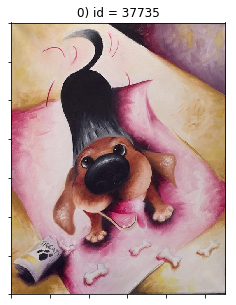

-------------------------------


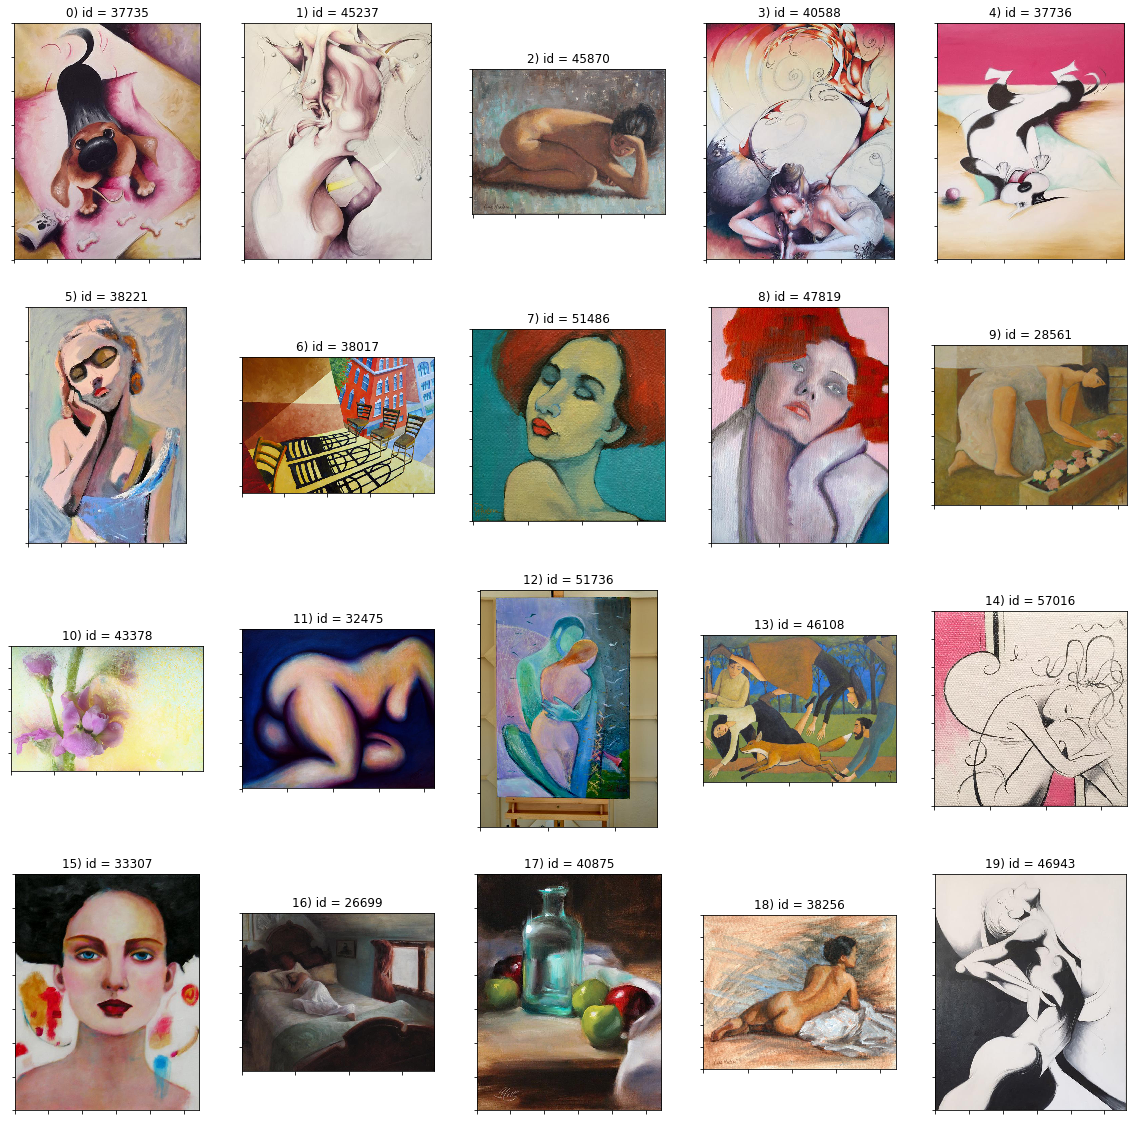

In [24]:
print('-------------------------------')
plot_images(plt, image_cache, profile_ids)
print('-------------------------------')
plot_images(plt, image_cache, rec_ids)